# PROJECT PV211

## Requirements

In [12]:
%%capture
!pip -q install kagglehub torchvision matplotlib torch numpy

In [13]:
import kagglehub
import os
import shutil
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
import numpy as np

In [8]:
# use cuda device if available
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

## Downloading data

In [1]:
# Downloading dataset from kaggle.com
path = kagglehub.dataset_download("mohitsingh1804/plantvillage")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 818M/818M [04:28<00:00, 3.19MB/s]

Extracting files...


Path to dataset files: C:\Users\Jskop\.cache\kagglehub\datasets\mohitsingh1804\plantvillage\versions\1


Downloaded data is already split to train and test data, thus I will combine it so that we can work with whole dataset and split it later rather on our own.

In [2]:
path = "C:/Users/Jskop/.cache/kagglehub/datasets/mohitsingh1804/plantvillage/versions/1"
train_dir = path + "/PlantVillage/train"
test_dir = path + "/PlantVillage/val"

In [2]:
# Iterate over class folders in the test directory
for class_name in os.listdir(test_dir):
    test_class_path = os.path.join(test_dir, class_name)
    train_class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(test_class_path):
        # Create the class directory in train directory if it doesn't exist
        os.makedirs(train_class_path, exist_ok=True)

        # Move all files from test to train
        for file_name in os.listdir(test_class_path):
            src = os.path.join(test_class_path, file_name)
            dst = os.path.join(train_class_path, file_name)
            shutil.move(src, dst)

        os.rmdir(test_class_path)

os.rmdir(test_dir)

print("Merged test into train successfully.")

Merged test into train successfully.


## Creating and analyzing dataset
We create dataset from downloaded data and then try to analyze the dataset as what is the distribution over individual classes and others.

In [3]:
#create a dataset using ImageFolder
dataset = datasets.ImageFolder(train_dir)

classes = dataset.classes

# Number of all samples
print(len(dataset))
# Number of classes
print(len(classes))
# Names of individual classes
print(classes)

54305
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___

In following chart we display the distribution of individual classes in our dataset to find out how balanced they are. We see they are not very well balenced, especially 3 classes *Orange___Haunglongbing_(Citrus_greening)*, *Soybean___healthy* and *Tomato___Tomato_Yellow_Leaf_Curl_Virus* are covered much more than others.

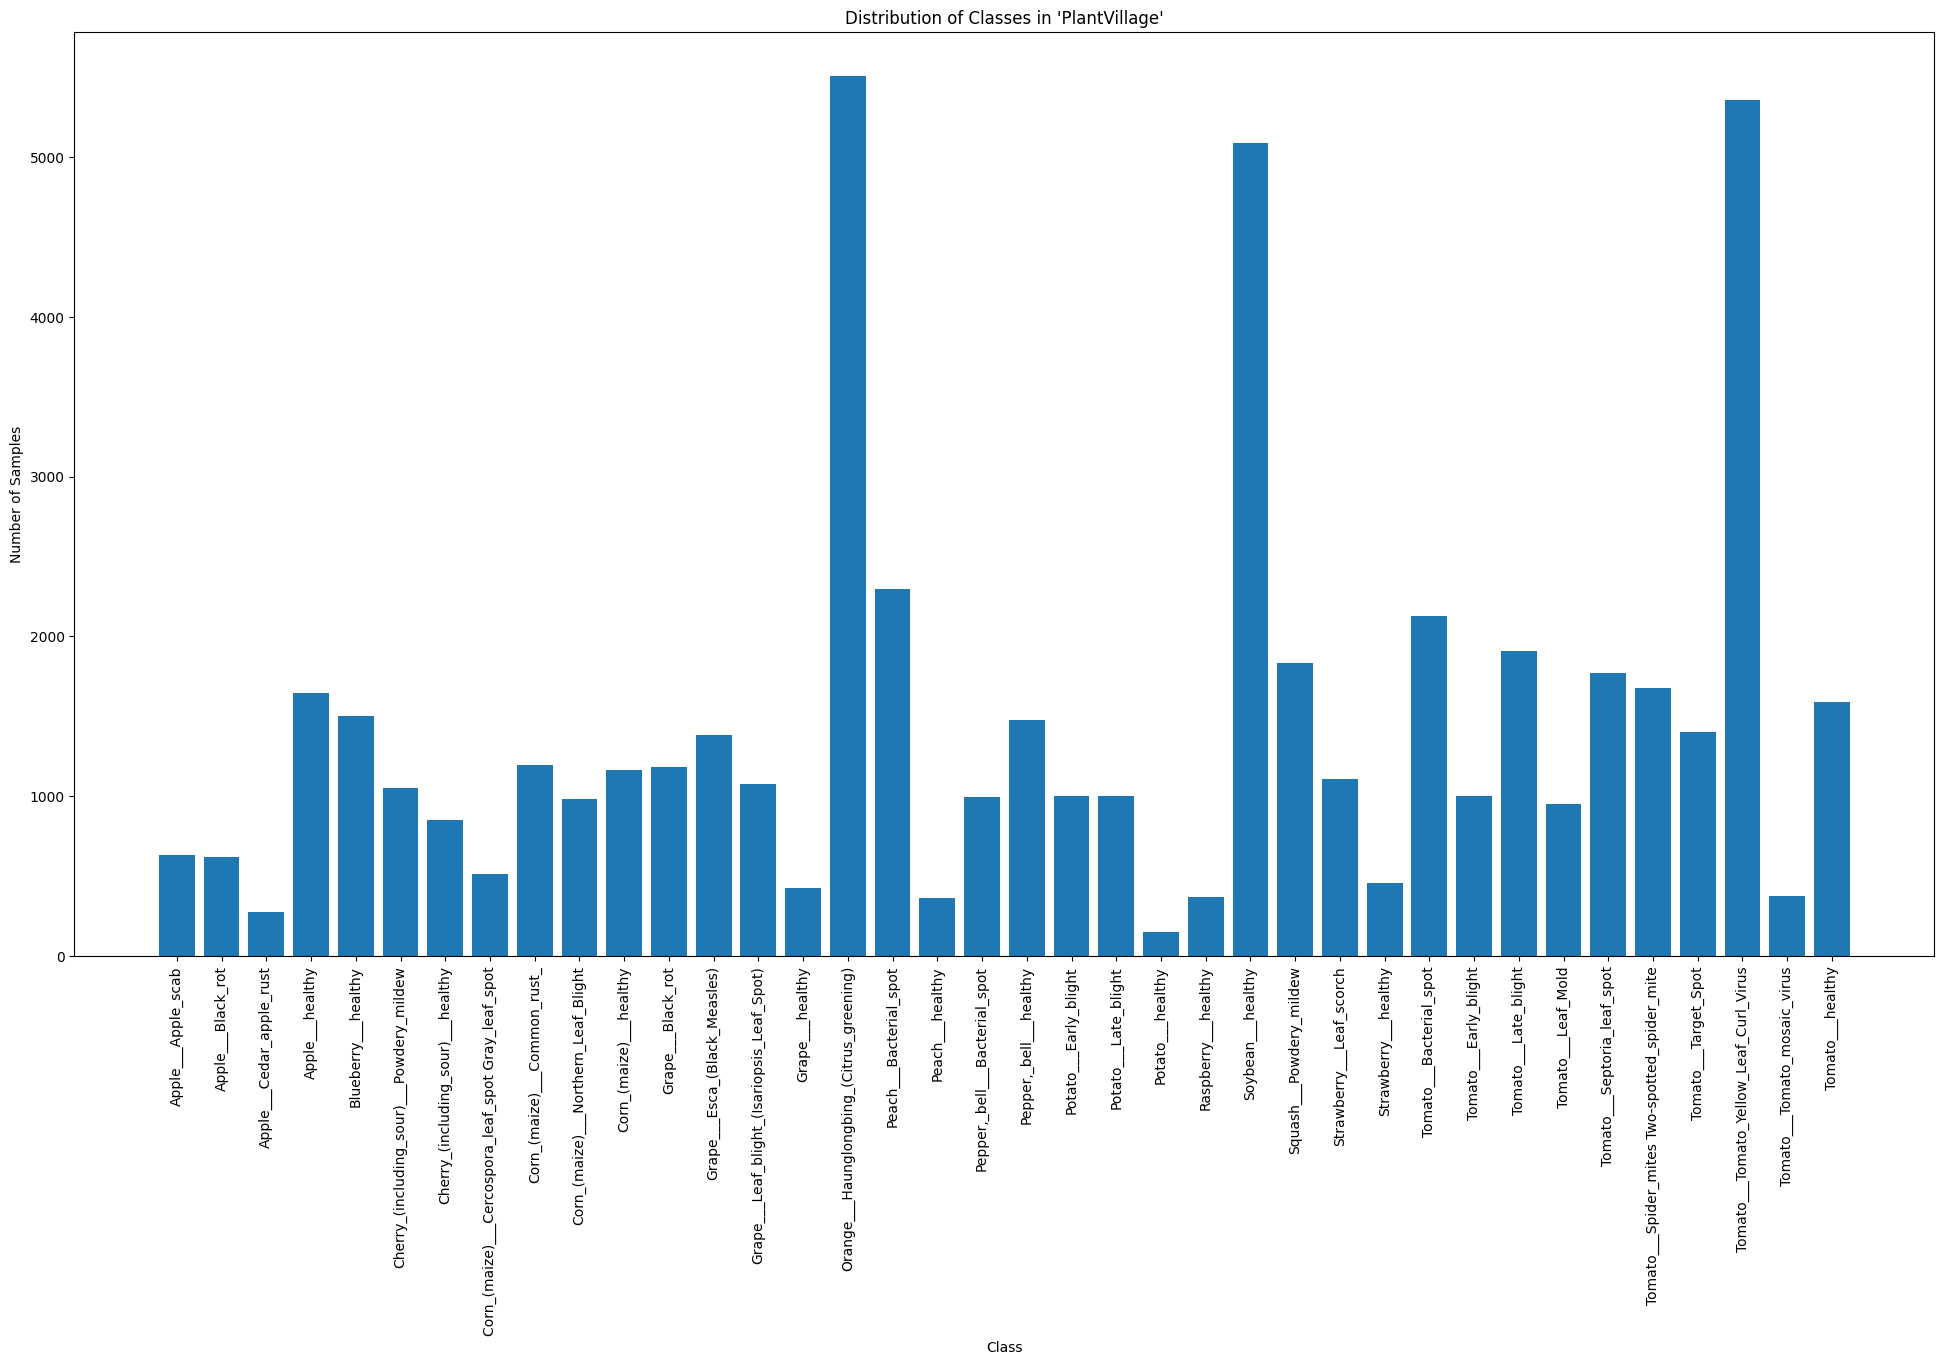

In [10]:
# Count the number of samples in each class
class_counts = [ len(os.listdir(os.path.join(train_dir, class_label))) for class_label in classes]

#class_counts = [0] * len(classes)
#for _, label in dataset:
#    class_counts[label] += 1

# Create a bar chart (histogram) to visualize the class distribution
plt.figure(figsize=(24, 12))
plt.bar(classes, class_counts)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in 'PlantVillage'")
plt.xticks(rotation=90)
plt.show()

In following chart checking if all images has the same resolution (256,256). They have.

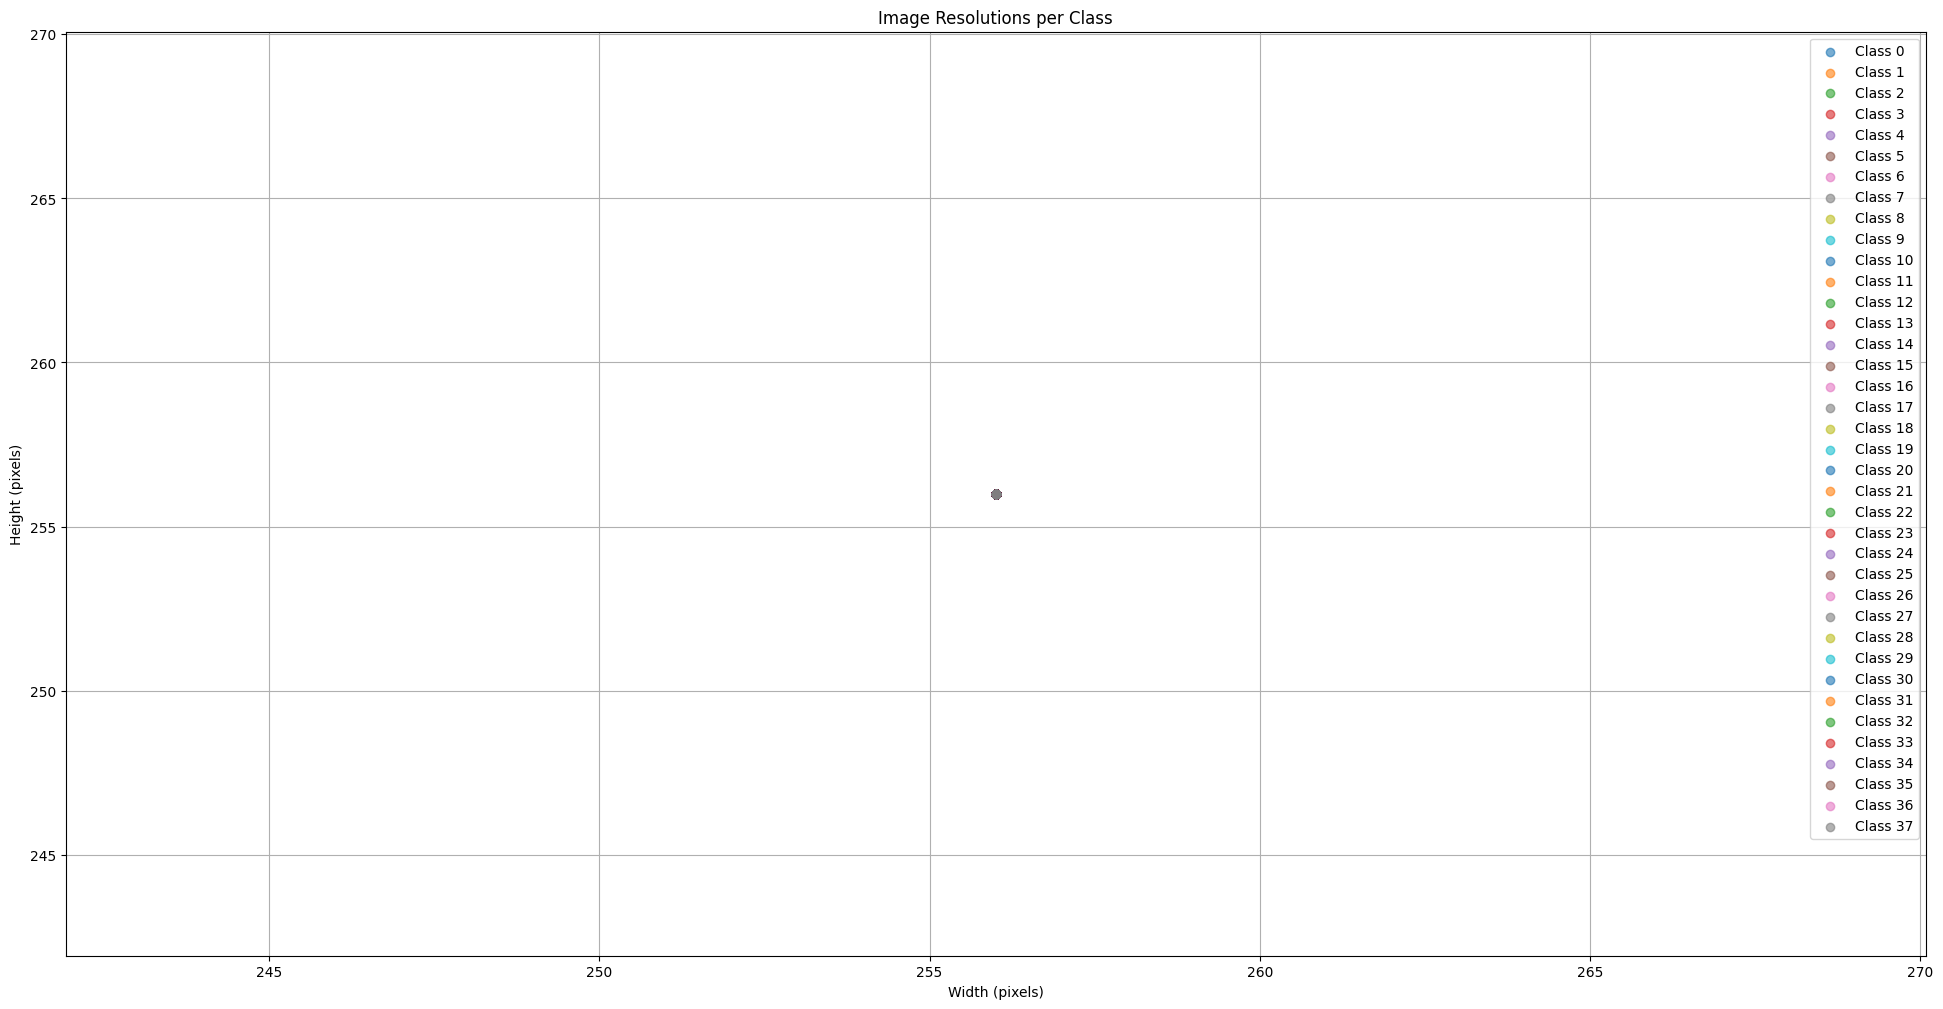

In [17]:
# Get label, width and height of each image
labels, widths, heights = zip([(label, img.size[0], img.size[1]) for img, label in dataset])

# Convert to NumPy arrays
labels = np.array(labels)
widths = np.array(widths)
heights = np.array(heights)

# Get unique class labels
unique_classes = np.unique(labels)

# Plot scatter plot of image resolutions per class
plt.figure(figsize=(24, 12))
for class_label in unique_classes:
    mask = labels == class_label  # Filter only images of particular class
    plt.scatter(widths[mask], heights[mask], label=f"Class {class_label}", alpha=0.6)

# Customize plot
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Image Resolutions per Class")
plt.legend()
plt.grid(True)
plt.show()